# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city = []
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dalandzadgad
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | mukah
'coord'
Processing Record 5 of Set 1 | fort st. john
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | grand-bassam
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kidal
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | kuala terengganu
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | taiohae
'coord'
Processing Record 21 of Set 1 | ust'-uda
Processing Record 22 of S

Processing Record 44 of Set 4 | greymouth
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | de aar
Processing Record 47 of Set 4 | kalmunai
Processing Record 48 of Set 4 | la villa del rosario
Processing Record 49 of Set 4 | mahibadhoo
Processing Record 0 of Set 5 | kot diji
Processing Record 1 of Set 5 | hermiston
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | voss
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | mukalla
Processing Record 6 of Set 5 | yuzhno-kurilsk
Processing Record 7 of Set 5 | mega
Processing Record 8 of Set 5 | tartu
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | selfoss
Processing Record 11 of Set 5 | cockburn town
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5 | cuyo
Processing Record 14 of Set 5 | saipan
Processing Record 15 of Set 5 | ribeira grande
Processing Record 16 of Set 5 | albany
Processing Record 17 of Set 5 | anadyr
Processing Record 18 of

Processing Record 40 of Set 8 | brandon
Processing Record 41 of Set 8 | fisterra
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | sinop
Processing Record 44 of Set 8 | bukama
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | feijo
Processing Record 47 of Set 8 | mwene-ditu
Processing Record 48 of Set 8 | luau
Processing Record 49 of Set 8 | pecos
Processing Record 0 of Set 9 | kovdor
Processing Record 1 of Set 9 | laojunmiao
Processing Record 2 of Set 9 | punta arenas
Processing Record 3 of Set 9 | zeya
Processing Record 4 of Set 9 | mont-laurier
Processing Record 5 of Set 9 | fort mcmurray
Processing Record 6 of Set 9 | freetown
Processing Record 7 of Set 9 | roman
Processing Record 8 of Set 9 | malanje
Processing Record 9 of Set 9 | lorengau
Processing Record 10 of Set 9 | tata
Processing Record 11 of Set 9 | kapa'a
Processing Record 12 of Set 9 | nuriootpa
Processing Record 13 of Set 9 | pithoro
Processing Record 14 of Set 9 | awjilah
Pro

Processing Record 36 of Set 12 | arkhangel'sk
Processing Record 37 of Set 12 | gochsheim
Processing Record 38 of Set 12 | sahibganj
Processing Record 39 of Set 12 | al kharijah
Processing Record 40 of Set 12 | sinjai
Processing Record 41 of Set 12 | devinuwara
'coord'
Processing Record 42 of Set 12 | kulia village
'coord'
Processing Record 43 of Set 12 | marsh harbour
Processing Record 44 of Set 12 | copperas cove
Processing Record 45 of Set 12 | forshaga
Processing Record 46 of Set 12 | nampula
Processing Record 47 of Set 12 | turpan
Processing Record 48 of Set 12 | nerchinsk
Processing Record 49 of Set 12 | kindu
Processing Record 0 of Set 13 | moanda
Processing Record 1 of Set 13 | strezhevoy
Processing Record 2 of Set 13 | plettenberg bay
Processing Record 3 of Set 13 | kurmuk
Processing Record 4 of Set 13 | yaren
Processing Record 5 of Set 13 | old town
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalandzadgad,43.5708,104.4250,23.95,39,0,1.79,MN,1690159599
1,edinburgh of the seven seas,-37.0676,-12.3116,13.42,79,38,11.39,SH,1690159599
2,olonkinbyen,70.9221,-8.7187,4.59,92,100,5.52,SJ,1690159599
3,fort st. john,56.2499,-120.8529,22.94,31,75,2.57,CA,1690159305
4,uturoa,-16.7333,-151.4333,25.91,76,83,5.58,PF,1690159600


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,23.95,39,0,1.79,MN,1690159599
1,edinburgh of the seven seas,-37.0676,-12.3116,13.42,79,38,11.39,SH,1690159599
2,olonkinbyen,70.9221,-8.7187,4.59,92,100,5.52,SJ,1690159599
3,fort st. john,56.2499,-120.8529,22.94,31,75,2.57,CA,1690159305
4,uturoa,-16.7333,-151.4333,25.91,76,83,5.58,PF,1690159600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

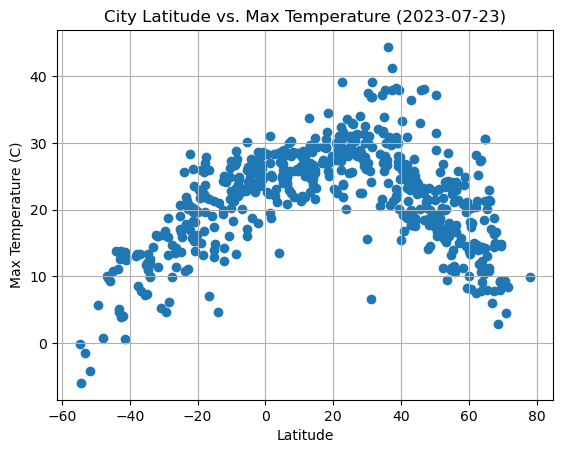

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-23)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

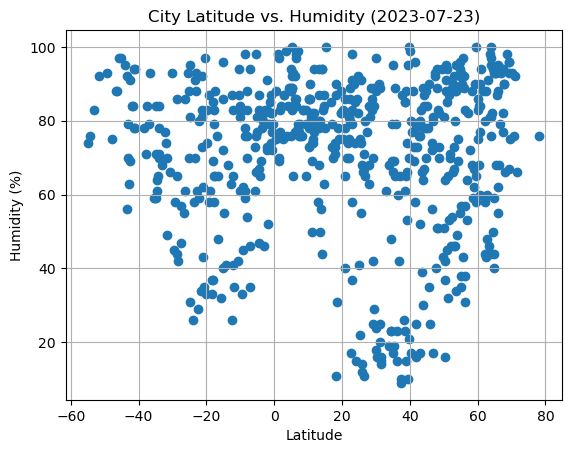

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

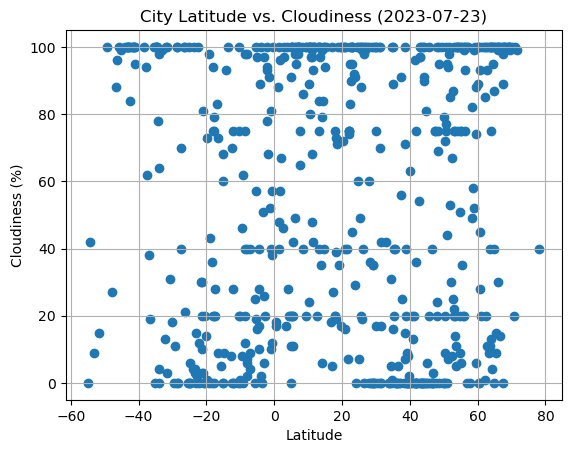

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-23)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

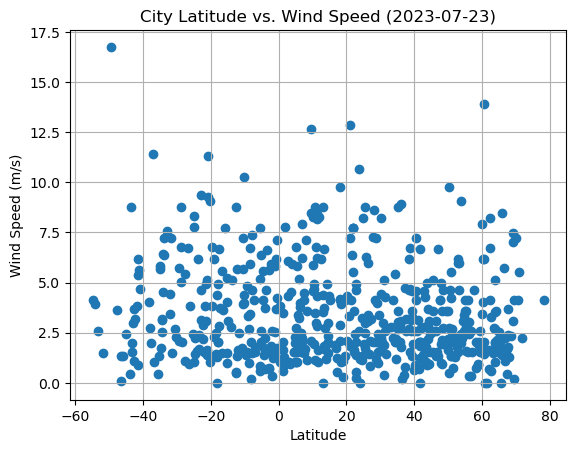

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-23)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Max Temp"]
y_values = city_data_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = y_values * slope + intercept
print(regress_values)

City_ID
0      33.355952
1     -19.832920
2      51.396795
3      41.719052
4      -6.420471
         ...    
576    44.676290
577   -17.844300
578    11.575521
579     4.255837
580    37.654020
Name: Lat, Length: 581, dtype: float64


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,23.95,39,0,1.79,MN,1690159599
2,olonkinbyen,70.9221,-8.7187,4.59,92,100,5.52,SJ,1690159599
3,fort st. john,56.2499,-120.8529,22.94,31,75,2.57,CA,1690159305
6,grand-bassam,5.2118,-3.7388,24.98,89,100,2.30,CI,1690159600
10,enewetak,11.3474,162.3373,28.57,74,93,8.15,MH,1690159601


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,13.42,79,38,11.39,SH,1690159599
4,uturoa,-16.7333,-151.4333,25.91,76,83,5.58,PF,1690159600
5,rawson,-43.3002,-65.1023,4.68,56,100,1.54,AR,1690159600
7,bredasdorp,-34.5322,20.0403,10.98,61,100,3.15,ZA,1690159600
8,port-aux-francais,-49.3500,70.2167,5.78,93,100,16.75,TF,1690159600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3317317787469238


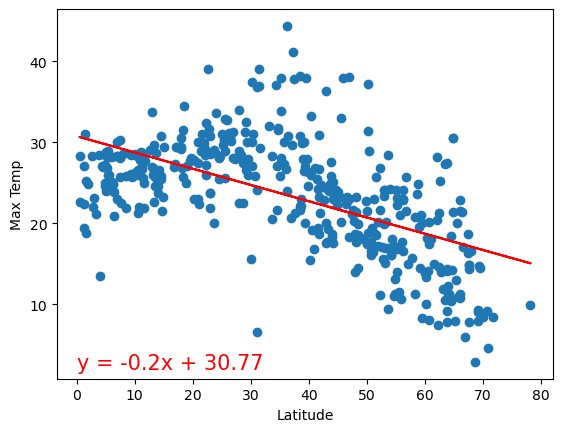

In [23]:
# Linear regression on Northern Hemisphere
x_values_n = northern_hemi_df["Lat"]
y_values_n = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept

# Create line equation string
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_n,(0,2),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6560433131622629


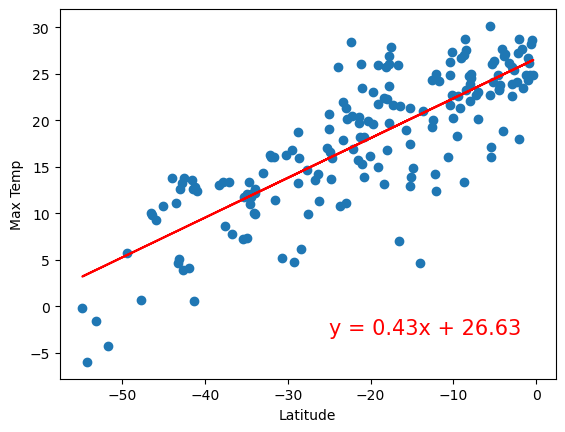

In [20]:
# Linear regression on Southern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept

# Create line equation string
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_s,(-25,-3),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004966690520375487


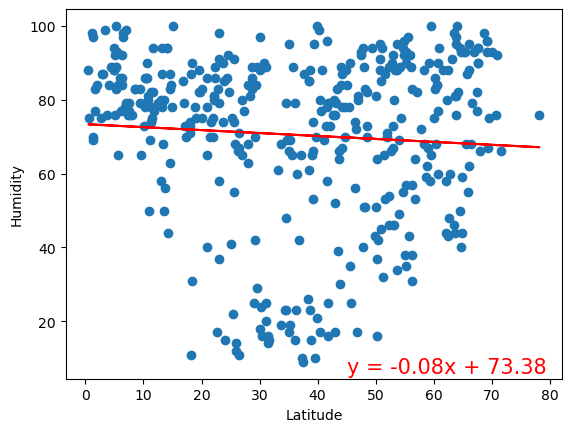

In [28]:
# Linear regression on Northern Hemisphere (Humidity)
x_values_hn = northern_hemi_df["Lat"]
y_values_hn = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_hn, y_values_hn)
regress_values_hn = x_values_hn * slope + intercept

# Create line equation string
line_eq_hn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_hn,y_values_hn)
plt.plot(x_values_hn,regress_values_hn,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_hn,(45,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.015478010569465392


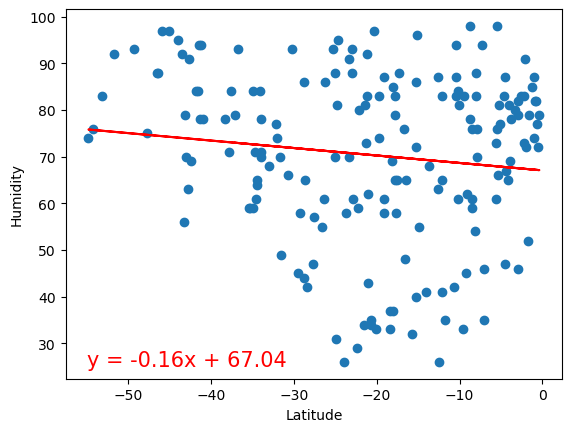

In [31]:
# Linear regression on Southern Hemisphere (Humidity)
x_values_sh = southern_hemi_df["Lat"]
y_values_sh = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sh, y_values_sh)
regress_values_sh = x_values_sh * slope + intercept

# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values_sh,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_sh,(-55,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005459243131762633


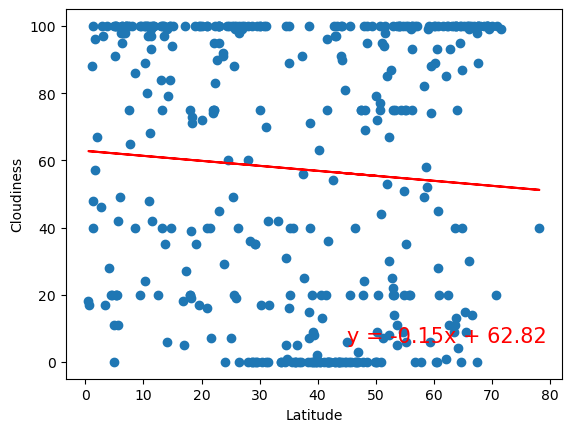

In [32]:
# Linear regression on Northern Hemisphere (Cloudiness)
x_values_nc = northern_hemi_df["Lat"]
y_values_nc = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nc, y_values_nc)
regress_values_nc = x_values_nc * slope + intercept

# Create line equation string
line_eq_nc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nc,y_values_nc)
plt.plot(x_values_nc,regress_values_nc,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_nc,(45,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.015478010569465392


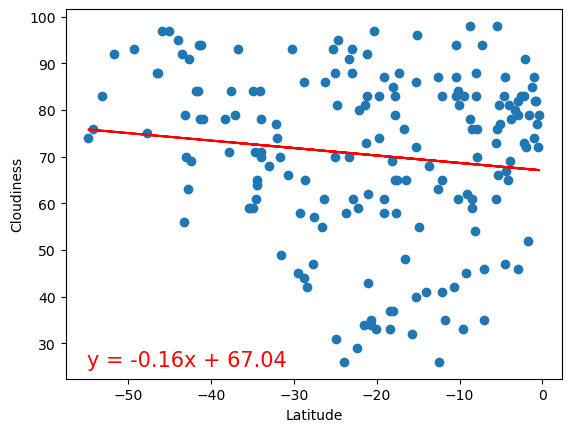

In [33]:
# Linear regression on Southern Hemisphere (Cloudiness)
x_values_sc = southern_hemi_df["Lat"]
y_values_sc = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sc, y_values_sc)
regress_values_sc = x_values_sc * slope + intercept

# Create line equation string
line_eq_sc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sc,y_values_sc)
plt.plot(x_values_sc,regress_values_sc,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_sc,(-55,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017475088141019987


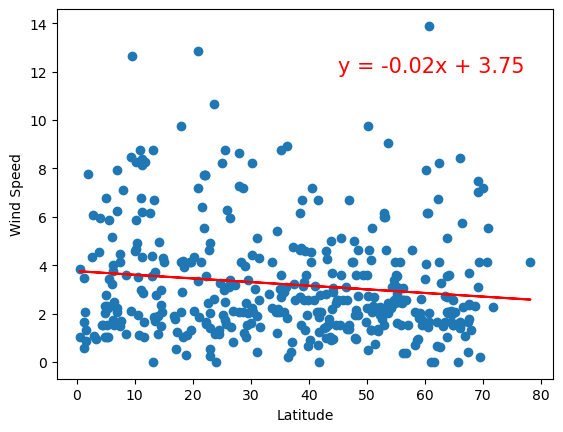

In [35]:
# Linear regression on Northern Hemisphere (Wind Speed)
x_values_nws = northern_hemi_df["Lat"]
y_values_nws = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nws, y_values_nws)
regress_values_nws = x_values_nws * slope + intercept

# Create line equation string
line_eq_nws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_nws,y_values_nws)
plt.plot(x_values_nws,regress_values_nws,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_nws,(45,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.005956829619363223


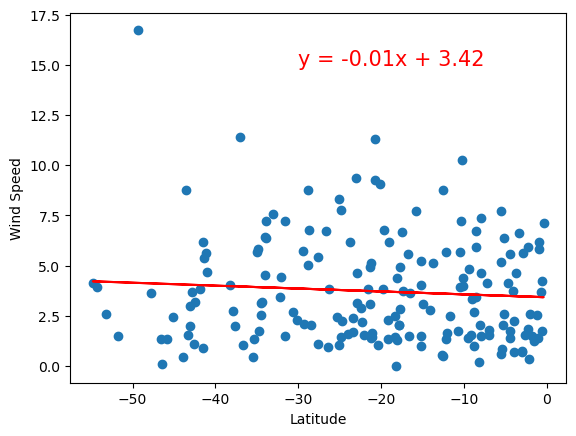

In [37]:
# Linear regression on Southern Hemisphere (Wind Speed)
x_values_sws = southern_hemi_df["Lat"]
y_values_sws = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sws, y_values_sws)
regress_values_sws = x_values_sws * slope + intercept

# Create line equation string
line_eq_sws = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values_sws,y_values_sws)
plt.plot(x_values_sws,regress_values_sws,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_sws,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE